# Import Library

In [157]:
# %matplotlib widget
# Ensure numpy, matplotlib, and pandas are installed and updated
%pip install --upgrade numpy matplotlib pandas

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load data

In [158]:
data=pd.read_csv('data/mass_31012025.csv',comment='#', delim_whitespace=True)
data

/tmp/ipykernel_25328/68347101.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv('data/mass_31012025.csv',comment='#', delim_whitespace=True)


,X_Value,Channel4,Channel3,Channel2,Channel1
0,0.000000e+00,-0.0072,-0.0008,-0.0040,0.0020
1,2.000000e-10,-0.0080,-0.0008,-0.0036,0.0020
2,4.000000e-10,-0.0088,-0.0008,-0.0032,0.0020
3,6.000000e-10,-0.0084,-0.0016,-0.0036,0.0020
4,8.000000e-10,-0.0076,-0.0012,-0.0036,0.0020
...,...,...,...,...,...
2540630,2.640247e+05,-0.0076,-0.0012,-0.0052,0.0024
2540631,2.640247e+05,-0.0080,-0.0012,-0.0044,0.0024
2540632,2.640247e+05,-0.0076,-0.0016,-0.0028,0.0040
2540633,2.640247e+05,-0.0080,-0.0012,-0.0028,0.0044


In [159]:
cols = data.columns[1:].tolist()
cols.reverse()
cols= [data.columns[0]] + cols
cols

['X_Value', 'Channel1', 'Channel2', 'Channel3', 'Channel4']

In [160]:
data=data[cols]
data

,X_Value,Channel1,Channel2,Channel3,Channel4
0,0.000000e+00,0.0020,-0.0040,-0.0008,-0.0072
1,2.000000e-10,0.0020,-0.0036,-0.0008,-0.0080
2,4.000000e-10,0.0020,-0.0032,-0.0008,-0.0088
3,6.000000e-10,0.0020,-0.0036,-0.0016,-0.0084
4,8.000000e-10,0.0020,-0.0036,-0.0012,-0.0076
...,...,...,...,...,...
2540630,2.640247e+05,0.0024,-0.0052,-0.0012,-0.0076
2540631,2.640247e+05,0.0024,-0.0044,-0.0012,-0.0080
2540632,2.640247e+05,0.0040,-0.0028,-0.0016,-0.0076
2540633,2.640247e+05,0.0044,-0.0028,-0.0012,-0.0080


# Plot Events

Adding a column for `event_ID` and repeated the `X_Value` of the first event for all events

In [161]:
# Define event size
event_size = 4001

# Ensure the DataFrame can be evenly split
num_events = len(data) // event_size
print(f'Expected number of events: {num_events}')

# Assign an Event_ID column to the DataFrame
data = data.iloc[:num_events * event_size].copy()  # Trim excess rows if any
data.insert(0,'Event_ID', data.index // event_size)


# Replace 'X_Value' for all events with 'times' from event 0
times = data[data['Event_ID'] == 0]['X_Value'].values
data['X_Value'] = np.tile(times, num_events)

#Store each event in the events list
events = []
for event_id in range(num_events):
    event_data = data[data['Event_ID'] == event_id]
    events.append(event_data)
# Optionally, store each event in separate CSV files    
    # event_data.to_csv(f"event_{event_id + 1}.csv", index=False)

# Print confirmation
print(f"Total events extracted: {len(events)}")

data

Expected number of events: 635


Total events extracted: 635


,Event_ID,X_Value,Channel1,Channel2,Channel3,Channel4
0,0,0.000000e+00,0.0020,-0.0040,-0.0008,-0.0072
1,0,2.000000e-10,0.0020,-0.0036,-0.0008,-0.0080
2,0,4.000000e-10,0.0020,-0.0032,-0.0008,-0.0088
3,0,6.000000e-10,0.0020,-0.0036,-0.0016,-0.0084
4,0,8.000000e-10,0.0020,-0.0036,-0.0012,-0.0076
...,...,...,...,...,...,...
2540630,634,7.992000e-07,0.0024,-0.0052,-0.0012,-0.0076
2540631,634,7.994000e-07,0.0024,-0.0044,-0.0012,-0.0080
2540632,634,7.996000e-07,0.0040,-0.0028,-0.0016,-0.0076
2540633,634,7.998000e-07,0.0044,-0.0028,-0.0012,-0.0080


In [162]:
def plot_event(num_event):
    by_event=data.groupby(data.Event_ID)
    event=(by_event.get_group(num_event)).drop(columns=['Event_ID'])
    event.plot(x='X_Value', y=['Channel4','Channel3','Channel2','Channel1'],
           xlim=(4e-7,7e-7), legend='True', #kind='scatter',
           title='Event '+str(num_event))
    
def print_line(line,df):
    mask = df['Event_ID'] == line
    print(df[mask])

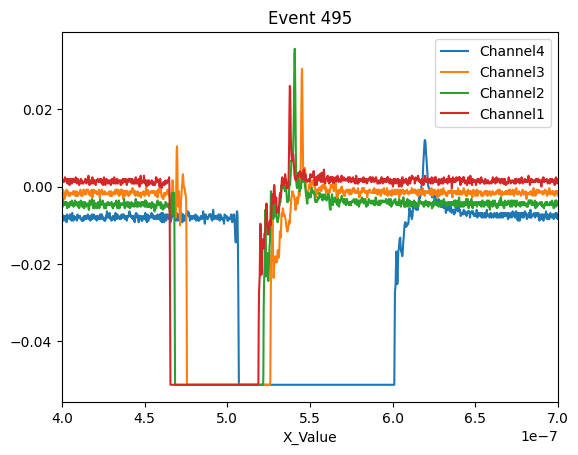

In [163]:
plot_event(495)

In [164]:
data.columns[2:]

Index(['Channel1', 'Channel2', 'Channel3', 'Channel4'], dtype='object')

# Determination of the velocity 

In [165]:
#Experiemntal constant 
D12=64e-2 #m
D23=88e-2 #m
D13= 152e-2 #m
d= 2.85e-2 #m: thickness of lead

#Fundamental constant
c=299792458 #m/s

In [166]:
def find_detection_times(data):
    '''less efficient version'''
    nevent = len(data) // event_size
    by_event = data.groupby(data.Event_ID)
    detection_times={}
    for event in range(nevent):
        data_event = by_event.get_group(event) #.drop(columns=['Event_ID'])
        dtimes = {}
        for channel in data_event.columns[1:-1]:
            k=0
            while np.abs(data_event[channel].iloc[k]) < 0.02:
                k+=1
            dtimes[channel] = data_event['X_Value'].iloc[k]
        detection_times[event]=dtimes
        dfres = pd.DataFrame(detection_times).transpose()
    return dfres

alternative version

In [167]:
def compute_detection_times(data, threshold=0.04):
    # Assume the DataFrame has columns: 'Event_ID', channel columns, and 'X_Value' as the last column.
    channels = data.columns[2:]  # Excludes 'Event_ID' and 'X_Value'
    
    # Reshape data to a long format: one row per measurement per channel.
    melted = data.melt(id_vars=['Event_ID', 'X_Value'],
                       value_vars=channels,
                       var_name='channel',
                       value_name='signal')
    
    # Filter rows where the absolute signal exceeds the threshold.
    filtered = melted[np.abs(melted['signal']) > threshold]
   #  print(filtered)
    
    # For each Event_ID and channel, find the smallest X_Value where the condition is met.
    detection_times = filtered.groupby(['Event_ID','channel'])['X_Value'].min().unstack()
    
 # Reset index so that 'Event_ID' becomes a column instead of the index.
    detection_times = detection_times.reset_index()  
    
    # Remove the column index name ('channel') when printing the DataFrame.
    detection_times.columns.name = None

    return detection_times


In [168]:
detection_times = compute_detection_times(data) 

In [169]:
detection_times['Dt21'] = (detection_times.Channel2 - detection_times.Channel1)
detection_times['Dt32'] = (detection_times.Channel3 - detection_times.Channel2)
detection_times['Dt31'] = (detection_times.Channel3 - detection_times.Channel1)
detection_times

,Event_ID,Channel1,Channel2,Channel3,Channel4,Dt21,Dt32,Dt31
0,0,4.670000e-07,4.692000e-07,4.724000e-07,5.080000e-07,2.200000e-09,3.200000e-09,5.400000e-09
1,1,4.694000e-07,4.694000e-07,4.736000e-07,5.080000e-07,0.000000e+00,4.200000e-09,4.200000e-09
2,2,4.676000e-07,4.690000e-07,4.738000e-07,5.078000e-07,1.400000e-09,4.800000e-09,6.200000e-09
3,3,4.682000e-07,4.690000e-07,4.734000e-07,5.078000e-07,8.000000e-10,4.400000e-09,5.200000e-09
4,4,4.670000e-07,4.686000e-07,4.736000e-07,5.074000e-07,1.600000e-09,5.000000e-09,6.600000e-09
...,...,...,...,...,...,...,...,...
630,630,4.674000e-07,4.684000e-07,4.708000e-07,5.072000e-07,1.000000e-09,2.400000e-09,3.400000e-09
631,631,4.686000e-07,4.686000e-07,4.742000e-07,5.070000e-07,0.000000e+00,5.600000e-09,5.600000e-09
632,632,4.672000e-07,4.684000e-07,4.720000e-07,5.070000e-07,1.200000e-09,3.600000e-09,4.800000e-09
633,633,4.646000e-07,4.684000e-07,4.730000e-07,5.070000e-07,3.800000e-09,4.600000e-09,8.400000e-09


In [170]:
def event_exclusion(detection_times):
    nevent = len(data) // event_size
    mask = (detection_times['Dt21'] > 0) & (detection_times['Dt32'] > 0) & (detection_times['Dt31'] > 0) #& (detection_times['Dt21'] < detection_times['Dt32'] ) 
    excluded_events = detection_times[~mask]
    kept_event = detection_times[mask].drop(columns=['Event_ID'])
    ndropped = nevent - np.sum(mask)
    print('Number of dropped event:', ndropped)
    return kept_event.reset_index(names='Event_ID'), excluded_events


In [171]:
kept_detection_times, excluded_detect_times = event_exclusion(detection_times)
kept_detection_times

Number of dropped event: 160


,Event_ID,Channel1,Channel2,Channel3,Channel4,Dt21,Dt32,Dt31
0,0,4.670000e-07,4.692000e-07,4.724000e-07,5.080000e-07,2.200000e-09,3.200000e-09,5.400000e-09
1,2,4.676000e-07,4.690000e-07,4.738000e-07,5.078000e-07,1.400000e-09,4.800000e-09,6.200000e-09
2,3,4.682000e-07,4.690000e-07,4.734000e-07,5.078000e-07,8.000000e-10,4.400000e-09,5.200000e-09
3,4,4.670000e-07,4.686000e-07,4.736000e-07,5.074000e-07,1.600000e-09,5.000000e-09,6.600000e-09
4,5,4.654000e-07,4.690000e-07,4.732000e-07,5.076000e-07,3.600000e-09,4.200000e-09,7.800000e-09
...,...,...,...,...,...,...,...,...
470,629,4.656000e-07,4.684000e-07,4.720000e-07,5.070000e-07,2.800000e-09,3.600000e-09,6.400000e-09
471,630,4.674000e-07,4.684000e-07,4.708000e-07,5.072000e-07,1.000000e-09,2.400000e-09,3.400000e-09
472,632,4.672000e-07,4.684000e-07,4.720000e-07,5.070000e-07,1.200000e-09,3.600000e-09,4.800000e-09
473,633,4.646000e-07,4.684000e-07,4.730000e-07,5.070000e-07,3.800000e-09,4.600000e-09,8.400000e-09


In [172]:
def randplot_excluded(df,num):
    assert num <= max(df.index), "num should be less or equal to the maximal index of df !"
    nfalse =np.random.randint(0,len(df), size=num)
    for n in list(nfalse):
        id = df.iloc[n,0]
        plot_event(id)

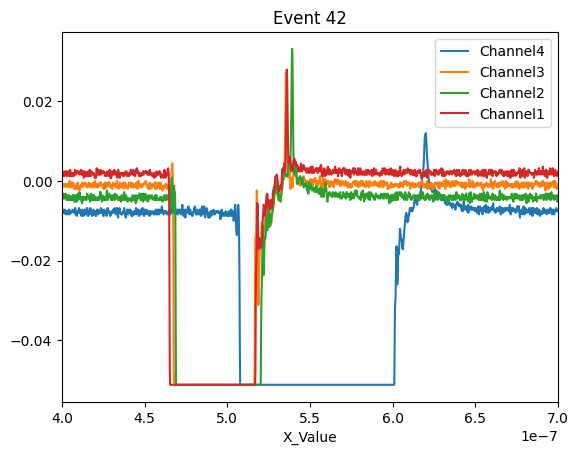

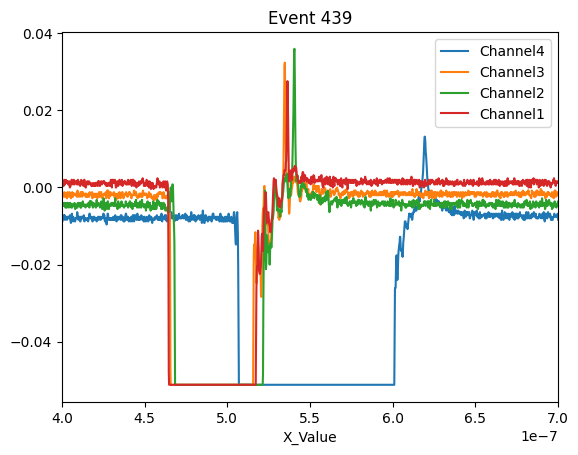

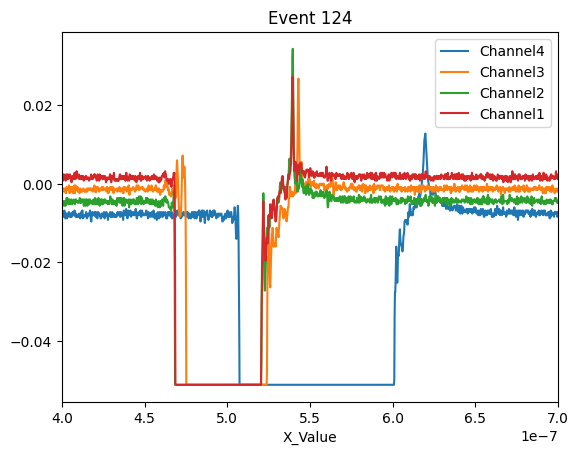

In [173]:
randplot_excluded(excluded_detect_times, 3)

In [174]:
def compute_velocities(Dt):
    times = list(Dt.columns[5:])
    distances=[D12, D23, D13]
    speeds = ['v21','v32','v31']
    betas = ['beta21','beta32','beta31']
    gammas = ['gamma21','gamma32','gamma31']
    cols = ['Event_ID']+speeds+betas+gammas
    
    velocities = pd.DataFrame(columns=cols)
    velocities['Event_ID']= Dt['Event_ID']

    for speed, beta, gamma, dist, time in zip(speeds, betas, gammas, distances, times):
        velocities[speed] = dist/Dt[time]
        velocities[beta] = velocities[speed]/c
        velocities[gamma] = (1-(velocities[beta])**2)**(-1/2)      

    mask = (velocities.beta21 > 1) | (velocities.beta32 > 1) | (velocities.beta31 > 1)
    false_velocities = velocities[mask]
    true_velocities = velocities[~mask]
    
    print('Number of supraluminic events:', len(false_velocities))
    
    keptcols = ['Event_ID']+betas+gammas

    return  false_velocities[keptcols], true_velocities[keptcols]

false_vel, true_vel = compute_velocities(kept_detection_times)
    

Number of supraluminic events: 404


In [175]:
true_vel

,Event_ID,beta21,beta32,beta31,gamma21,gamma32,gamma31
0,0,0.970368,0.917301,0.938921,4.138547,2.511339,2.905859
4,5,0.593003,0.698896,0.650022,1.241927,1.398165,1.315936
8,10,0.667128,0.638123,0.650022,1.342385,1.298811,1.315936
16,23,0.821081,0.667128,0.724311,1.751891,1.342385,1.450381
33,50,0.889504,0.611534,0.704191,2.188534,1.263874,1.408429
...,...,...,...,...,...,...,...
451,602,0.667128,0.863342,0.768208,1.342385,1.981695,1.562012
457,610,0.711603,0.978455,0.845029,1.423323,4.843513,1.870136
467,626,0.821081,0.524172,0.618314,1.751891,1.174243,1.272376
470,629,0.762432,0.815379,0.792215,1.545432,1.727331,1.638693


In [176]:
false_vel

,Event_ID,beta21,beta32,beta31,gamma21,gamma32,gamma31
1,2,1.524864,0.611534,0.817770,NaN,1.263874,1.737483
2,3,2.668513,0.667128,0.975034,NaN,1.342385,4.503332
3,4,1.334256,0.587073,0.768208,NaN,1.235278,1.562012
5,6,0.485184,2.096689,0.874168,1.143626,NaN,2.059208
6,8,3.558017,0.978455,1.408382,NaN,4.843513,NaN
...,...,...,...,...,...,...,...
468,627,0.426962,2.096689,0.792215,1.105865,NaN,1.638693
469,628,1.524864,0.698896,0.905388,NaN,1.398165,2.355243
471,630,2.134810,1.223068,1.491228,NaN,NaN,NaN
472,632,1.779009,0.815379,1.056286,NaN,1.727331,NaN


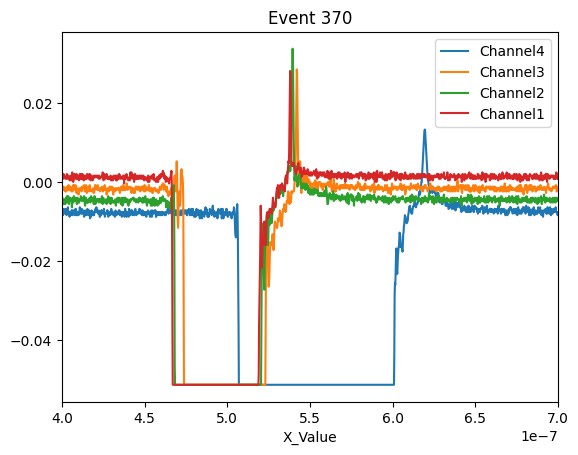

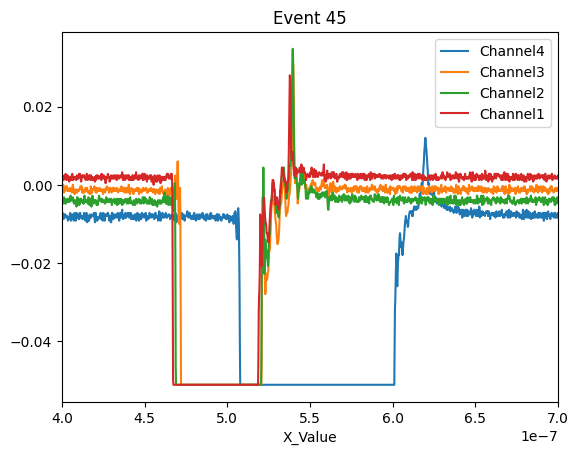

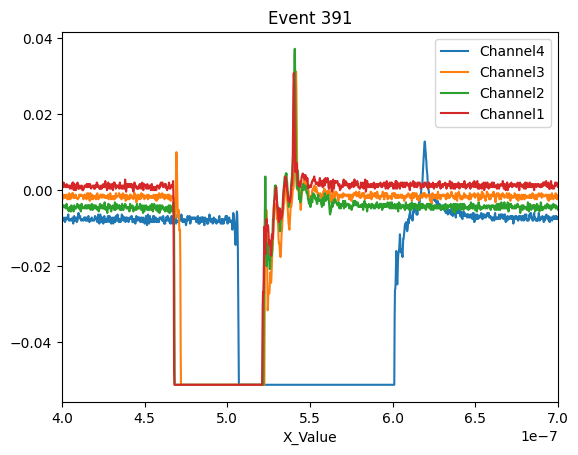

In [177]:
randplot_excluded(false_vel,3)

In [178]:
print_line(288, false_vel)

     Event_ID   beta21    beta32    beta31   gamma21  gamma32   gamma31
209       288  0.41054  1.048344  0.633772  1.096681      NaN  1.292791


# Determination of the mass

In [ ]:
# Constantes physiques
c = 3e8  # m/s, vitesse de la lumière
e = 1.602e-19  # C, charge de l'électron
m_e = 9.109e-31  # kg, masse de l'électron
N_A = 6.022e23  # mol^-1, nombre d'Avogadro

# Paramètres du plomb
Z = 82  
A = 207  
I = 823 * e  # J, potentiel d'excitation moyen Plomb, source : particle data group

# Épaisseur du matériau traversé
d = 0.0285  # m, épaisseur du matériau traversé (2.85 cm)


r_e = 2.82e-15 # m
K = 4 * np.pi * N_A * r_e**2 * m_e * c**2

# Liste pour stocker les masses calculées
m_mu_values = []

# Itération sur chaque ligne du DataFrame true_vel
for index, row in true_vel.iterrows():
    beta_1 = row['beta21']  # Beta initial
    beta_2 = row['beta32']  # Beta final
    gamma_1 = row['gamma21']  # Gamma initial
    gamma_2 = row['gamma32']  # Gamma final

    if beta_1 == beta_2:
        print(f"Event {row['Event_ID']} : beta_1 = beta_2 = {beta_1}")
        continue
    if gamma_1 == gamma_2:
        print(f"Event {row['Event_ID']} : gamma_1 = gamma_2 = {gamma_1}")
        continue

    # Calcul de dE/dx (formule de Bethe simplifiée)
    beta = beta_1  # Utilisation de beta_1 pour le calcul de dE/dx
    dE_dx = K * Z / A * (1 / beta**2) * (np.log(2 * m_e * c**2 * beta**2 * gamma_1**2 / I) - beta**2)

    # Calcul de la masse du muon
    delta_E = - dE_dx * d  # Énergie perdue
    if gamma_2 - gamma_1 != 0:  # Éviter une division par zéro
        m_mu = delta_E / ((gamma_2 - gamma_1) * c**2)
        m_mu_values.append(m_mu)
    else :
        print(f"Event {row['Event_ID']} : division par zéro évitée")

# Calcul de la moyenne et de l'écart-type
m_mu_mean = np.mean(m_mu_values)
m_mu_std = np.std(m_mu_values)

print(f"Nombre d'événements analysés : {len(m_mu_values)}")
print(f"Masse théorique du muon : 1.883e-28 kg")
print(f"Masse moyenne du muon : {m_mu_mean:.2e} kg")
print(f"Incertitude (écart-type) : {m_mu_std:.2e} kg")
print(f"Pourcentage d'incertitude : {m_mu_std / m_mu_mean * 100:.2f} %")


Nombre d'événements analysés : 71
Masse théorique du muon : 1.883e-28 kg
Masse moyenne du muon : 1.10e-23 kg
Incertitude (écart-type) : 9.17e-23 kg
Pourcentage d'incertitude : 836.66 %
